<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-параметров-квартиры" data-toc-modified-id="Изучение-параметров-квартиры-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучение параметров квартиры</a></span></li><li><span><a href="#Изучение-времени-продажи-квартиры" data-toc-modified-id="Изучение-времени-продажи-квартиры-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Изучение времени продажи квартиры</a></span></li><li><span><a href="#Обработка-редких-и-выбивающихся-значений" data-toc-modified-id="Обработка-редких-и-выбивающихся-значений-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Обработка редких и выбивающихся значений</a></span></li><li><span><a href="#Факторы,-влияющие-на-стоимость-квартиры" data-toc-modified-id="Факторы,-влияющие-на-стоимость-квартиры-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Факторы, влияющие на стоимость квартиры</a></span></li><li><span><a href="#Определение-10-населённых-пунктов-с-наибольшим-числом-объявлений" data-toc-modified-id="Определение-10-населённых-пунктов-с-наибольшим-числом-объявлений-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Определение 10 населённых пунктов с наибольшим числом объявлений</a></span></li><li><span><a href="#Изучение-предложения-квартир-в-Санкт-Петербурге" data-toc-modified-id="Изучение-предложения-квартир-в-Санкт-Петербурге-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Изучение предложения квартир в Санкт-Петербурге</a></span></li><li><span><a href="#Изучение-сегмента-квартир-в-центре-Санкт-Петербурга" data-toc-modified-id="Изучение-сегмента-квартир-в-центре-Санкт-Петербурга-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Изучение сегмента квартир в центре Санкт-Петербурга</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

Нам предоставлены данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры, что в будущем позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [127]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


### Вывод

После изучения таблицы, можно сделать следующие выводы:
- Таблица состоит из 22 столбцов и 23699 строк;
- Во многих столбцах имеются пропущенные значения. Необходимо установить возможные причины появления пропусков и устранить их;
- Исходя из числовых характеристик таблицы, видно, что требуют обработки некорректные данные, к примеру: высота потолков минимум равняется 1, а максимум - 100;
- В ряде столбцов необходимо изменить тип на целочисленный, к примеру: столбец 'last_price', т.к. точность до копеек не нужна;
- Столбец с датой необходимо перевести в формат datetime;
- Столбцы с информацией о расстояние до центра, аэропорта, ближайшего парка и водоёма были рассчитаны системой автоматически. Так как система использовала определенный радиус поиска, поэтому, если объекты не попадали в эту зону, возникали пропуски в ячейках. 


## Предобработка данных

Первым делом, необходимо избавиться от тех столбцов, которые не понадобятся в дальнейшей работе над проектом. К тому же это позволит немного сократить объём занимаемой памяти.

In [129]:
df.drop(['total_images'], axis='columns', inplace=True)
df.drop(['is_apartment'], axis='columns', inplace=True)
df.drop(['studio'], axis='columns', inplace=True)
df.drop(['open_plan'], axis='columns', inplace=True)

***По порядку обработаем значения оставшихся столбцов.***

Заменим пропущенные значения в столбцах, где можно применить логичную замену, т.е. записать 0 вместо пропуска. Для квартир где нет балкона или в радиусе 3 км нет парков и прудов, вместо пропуска назначим 0.

In [130]:
df['balcony'] = df['balcony'].fillna(0)
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

***Отредактируем столбец 'last_price'.*** 

Проверим распределение цены

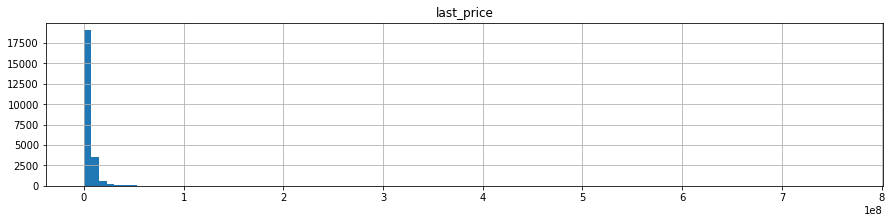

In [131]:
df.hist('last_price', bins=100, figsize=(15, 3));

График не выглядит как нормальное распределение. Исходя из числовых характеристик столбца (min = 12190 и max = 763 000 000), проверим, что представляют из себя "выбросы". Рассмотрим сколько объявлений находится в диапазоне цены от 0 до 1 млн. и от 50 млн. до 800 млн.

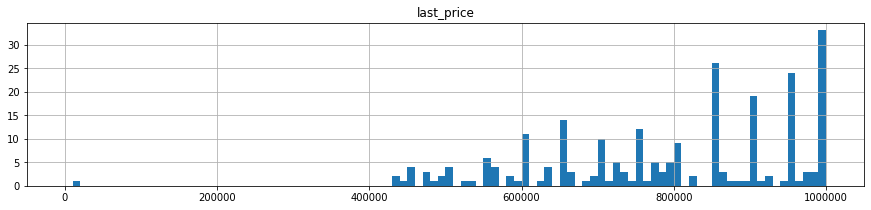

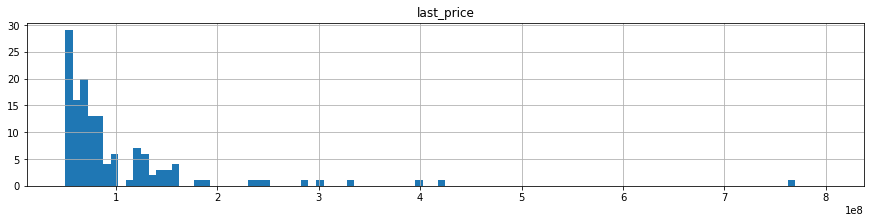

In [132]:
df.hist('last_price', bins=100, range=(0, 1000000), figsize=(15, 3))
plt.show()
df.hist('last_price', bins=100, range=(50000000, 800000000), figsize=(15, 3))
plt.show()

Видно, что есть очень дешевая и очень дорогая цена. По результатам построенных графиков сохраним в таблице срез данных по цене от 500 тыс. до 100 млн. Данный срез позволит получить более правдоподобные результаты в исследовании.

In [133]:
df = df.query('500000 <= last_price <= 100000000')

***Проверим столбец с общей площадью.***

count    23648.000000
mean        59.937419
std         33.476014
min         12.000000
25%         40.000000
50%         52.000000
75%         69.600000
max        590.000000
Name: total_area, dtype: float64


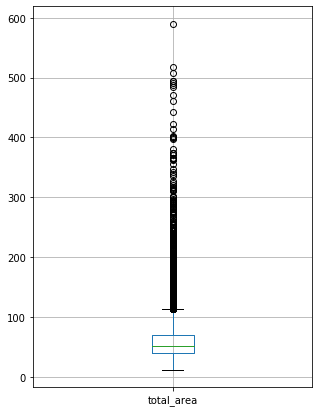

In [134]:
print(df.total_area.describe())
df.boxplot('total_area', figsize=(5, 7));

Данные в столбце с общей площадью выглядят корректными. Среднее и медианное значения разнятся не сильно. Помещений с большой площадью не так много, вероятно это коммуналки или общежития.

***Проверим столбец с количеством комнат.***

In [135]:
df.rooms.value_counts()

1     8039
2     7933
3     5810
4     1171
5      316
0      197
6      100
7       54
8       10
9        8
10       3
14       2
11       2
15       1
19       1
16       1
Name: rooms, dtype: int64

Столбец выглядит корректным. Ячейки со значением ноль, это вероятнее всего студии и перепланированные квартиры. Квартиры с двухзначным количеством комнат скорее всего коммунальные квартиры или целый этаж был выкуплен под одну квартиру.

***Откорректируем данные в столбце с высотой потолков.***

Сохраним в столбце значения высоты потолка в диапазоне от 2.3 м до 4.5 м. Так как наименьшая высота с учетом наличия натяжных потолков не может быть ниже 2.3 метров. А в зданиях старой посторйки в центре Петербурга встречаются потолки до 4.5 метров.

In [136]:
df.query('ceiling_height < 2.3 or ceiling_height > 4.5')['ceiling_height'].count()

54

Количество значений не попадающих в этот диапазон равно 54. Удалим эти значения.

In [137]:
index_list = df.query('ceiling_height < 2.3 or ceiling_height > 4.5').index

In [138]:
df.drop(index_list, axis=0, inplace=True)

In [139]:
df['ceiling_height'].describe()

count    14422.000000
mean         2.724190
std          0.266457
min          2.300000
25%          2.520000
50%          2.650000
75%          2.800000
max          4.500000
Name: ceiling_height, dtype: float64

Пропущенные значения в столбце заполним медианным значением, т.к. 3/4 значений находится в диапазоне до 2.80 м. Высокие потолки редки, но они всё-таки сдвигают среднее значение.

In [140]:
df['ceiling_height'] = df['ceiling_height'].fillna(2.65)

In [141]:
print('Количество пропусков - ', df['ceiling_height'].isna().sum())

Количество пропусков -  0


***Посчитаем пропуски в столбцах с количеством этажей и названием населенного пункта.***

In [142]:
print('Количество пропусков в столбце "floors_total" - ', df['floors_total'].isna().sum())
print('Количество пропусков в столбце "locality_name" - ', df['locality_name'].isna().sum())

Количество пропусков в столбце "floors_total" -  86
Количество пропусков в столбце "locality_name" -  49


Учитывая, что пропусков менее одного процента, и в дальнейших расчётах их отсутствие не навредит результату исследования, то избавимся от этих строк. Название населенного пункта можно заполнить если бы был столбец с координатами местности, а этажность - если бы был номер проекта дома или хотя бы его высота. Без этих данных, я считаю, некорректно заполнять пропуски средним или медианным значением. 

In [143]:
df.dropna(subset = ['floors_total', 'locality_name'], inplace = True)

***Корректировка столбцов 'living_area' и 'kitchen_area'.***

Для заполнения пропусков в столбце с жилой площадью нужно использовать значения общей площади. Для начала проверим корреляцию этих величин.

In [144]:
print('Коэффициент корреляции = ', df['total_area'].corr(df['living_area']))
print('Коэффициент корреляции = ', df['total_area'].corr(df['kitchen_area']))

Коэффициент корреляции =  0.9379301207802745
Коэффициент корреляции =  0.5944379683196049


Корреляция общей и жилой площади высокая и положительная. Что говорит о том, что обе велечины сильно взаимосвязаны, и при росте одной, увеличивается и другая. Корреляция общей и кухонной площади средняя и положительная. В данном случае, я считаю, значения коэффициента достаточным, т.к. на него влияют дополнительные факторы: к примеру, с ростом общей площади, нет необходимости бесконечно увеличивать кухню.

Сперва округлим значения до одной десятой.

In [145]:
df['total_area'] = df['total_area'].round(1)
df['living_area'] = df['living_area'].round(1)
df['kitchen_area'] = df['kitchen_area'].round(1)

Так как в числовых характеристиках присутствуют значения площадей не укладывающиеся в установленные нормы, проверим их распределение в диапазоне до $10 м^2$.

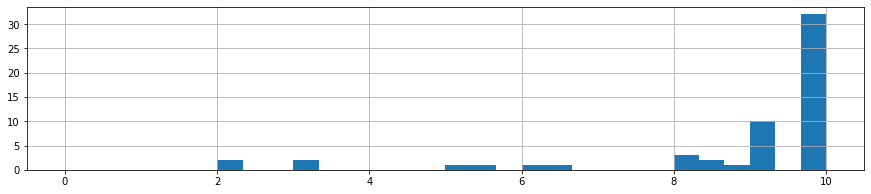

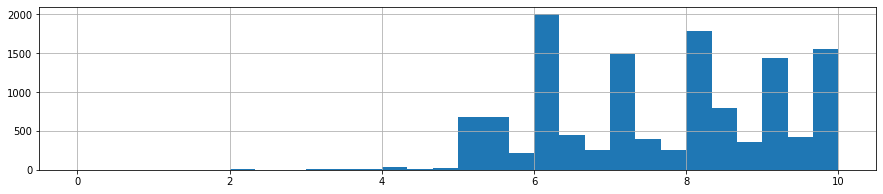

In [146]:
df['living_area'].hist(bins=30, range=(0, 10), figsize=(15, 3))
plt.show()
df['kitchen_area'].hist(bins=30, range=(0, 10), figsize=(15, 3))
plt.show()

С учетом графиков, жилищных норм и наличия квартир-студий, сохраним в таблице следующие значения площадей: для жилой - более $6м^2$, для площади кухни - более $3м^2$.

In [147]:
print('Количество некорректных значений жилой площади - ', df.query('living_area < 6')['living_area'].count())
print('Количество некорректных значений площади кухни - ',df.query('kitchen_area < 3')['kitchen_area'].count())

Количество некорректных значений жилой площади -  6
Количество некорректных значений площади кухни -  11


In [148]:
index_list_liv = df.query('living_area < 6').index
index_list_kit = df.query('kitchen_area < 3').index

In [149]:
df.drop(index_list_liv, axis=0, inplace=True)
df.drop(index_list_kit, axis=0, inplace=True)

In [150]:
df[['living_area', 'kitchen_area']].describe()

,living_area,kitchen_area
count,21593.000000,21247.000000
mean,34.251012,10.522973
std,21.073052,5.737930
min,6.000000,3.000000
25%,18.600000,7.000000
50%,30.000000,9.100000
75%,42.200000,12.000000
max,409.000000,107.000000


Теперь заполним пропуски в столбцах с жилой площадью. В данном случае, считаю целесообразным, заполнять медианным значением, предварительно сгруппировав по столбцу с общей площадью.

In [151]:
df['living_area'] = df.groupby('total_area')['living_area'].apply(lambda x: x.fillna(x.median()))
import warnings
warnings.filterwarnings("ignore")

In [152]:
df['living_area'].isna().sum()

39

Осталось 39 незаполненных значенний, скорее всего это квартиры с индивидуальными характеристиками и по ним не подобралось медианы. Избавимся от этих значений, их количество невелико.

In [153]:
df.dropna(subset = ['living_area'], inplace = True)

Учитывая предыдущий опыт, пропуски в столбце с площадью кухни лучше заполним c помощью коэффициента, который показывает, какую долю в среднем от общей площади составляет кухня. 

In [154]:
kitchen_mean_frac = (df['kitchen_area'] / df['total_area']).mean()
kitchen_mean_frac

0.18749896723867154

In [155]:
df['kitchen_area'] = df['kitchen_area'].fillna((df['total_area'] * kitchen_mean_frac)).round(1)

In [156]:
df['kitchen_area'].isna().sum()

0

***Заполним пропуски в столбце 'days_exposition'.***  

Для заполнения пропусков используем медианные значения. Предварительно сгруппируем по населенному пункту, потому что в городе и деревне квартиры продаются с разной скоростью.

In [157]:
df['days_exposition'] = df.groupby('locality_name')['days_exposition'].apply(lambda x: x.fillna(x.median()))

In [158]:
df['days_exposition'].isna().sum()

81

Не все пропуски заполнились. Значит есть населенные пункты, где есть единичные продажи, по которым не взять медиану.  
Оставшиеся пропуски удалим, их не так много.

In [159]:
df.dropna(subset = ['days_exposition'], inplace = True)
df['days_exposition'].isna().sum()

0

***Столбцы 'cityCenters_nearest', 'airports_nearest', 'parks_nearest', 'ponds_nearest'.***  

В случае с этими столбцами правильнее будет оставить эти значения пустыми. Так как информация по ним заполнялась системой автоматически на основе картографических данных, то нам неизвестно какими координатами определены местоположения центра, аэропорта и т.д. В связи с этим не сработает обработка пропусков медианой или средним арифметическим. В данном случае отсутствие значения — тоже важный сигнал.

***Проверка на дубликаты***  

Перед тем, как проверить на дубликаты, вызовем список уникальных названий населенных пунктов.

In [160]:
df['locality_name'] = df['locality_name'].astype(str)

In [161]:
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Никольское', 'Новая Ладога',
       'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво', 'Подпорожье',
       'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург', 'Светогорск',
       'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор', 'Сясьстрой',
       'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Рощино', 'городской посёлок Свирьстрой',
       'городской посёлок Фёдоровское', 'городской посёлок Янино-1',
     

Как видно из списка, при заполнении информации в одном случае используют букву "е", а в другом случае букву "ё" и получается поселок/посёлок. Избавимся от такого недочёта.

In [162]:
# заменим все "ё" на "е" в столбце 'locality_name'
import re

for ind_str in df.loc[(df['locality_name'].isna()==False),'locality_name'].index:    
    loc_str = df.loc[ind_str, 'locality_name']
    if ('ё' or 'Ё') in loc_str:
        loc_str = re.sub('ё', 'е', loc_str)
        loc_str = re.sub('Ё', 'Е', loc_str)
    df.loc[ind_str, 'locality_name'] = loc_str

In [163]:
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Никольское', 'Новая Ладога',
       'Отрадное', 'Павловск', 'Петергоф', 'Пикалево', 'Подпорожье',
       'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург', 'Светогорск',
       'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор', 'Сясьстрой',
       'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Будогощь',
       'городской поселок Виллози', 'городской поселок Мга',
       'городской поселок Назия', 'городской поселок Новоселье',
       'городской поселок Павлово', 'городской поселок Рощино',
       'городской поселок Свирьстрой', 'городской поселок Федоровское',
       'городской поселок Янино-1', 'деревня Агалатово', 'деревня Аро'

Теперь проверим таблицу на дубликаты.

In [164]:
print('Всего дубликатов - ', df.duplicated().sum())

Всего дубликатов -  0


Дубликатов нет. После проведенных изменений нужно перезаписать индексацию.

In [165]:
df = df.reset_index(drop=True)

***Изменение типов данных.***

В столбце с датой публикации объявления изменим тип данных на datetime.

In [166]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

Изменим тип данных на целочисленный в тех столбцах, где это необходимо. К примеру нам не нужна точность цены до копейки, а полтора балкона или парка не может быть.

In [167]:
df = df.round({'days_exposition': 0})
df = df.astype({'last_price': 'Int64',
               'rooms': 'Int64',
                'floors_total': 'Int64',
                'floor': 'Int64',
                'balcony': 'Int64',
                'airports_nearest': 'Int64',
                'cityCenters_nearest': 'Int64',
                'parks_around3000': 'Int64',
                'parks_nearest': 'Int64',
                'ponds_around3000': 'Int64',
                'ponds_nearest': 'Int64',
                'days_exposition': 'Int64'             
})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23323 entries, 0 to 23322
Data columns (total 18 columns):
last_price              23323 non-null Int64
total_area              23323 non-null float64
first_day_exposition    23323 non-null datetime64[ns]
rooms                   23323 non-null Int64
ceiling_height          23323 non-null float64
floors_total            23323 non-null Int64
living_area             23323 non-null float64
floor                   23323 non-null Int64
kitchen_area            23323 non-null float64
balcony                 23323 non-null Int64
locality_name           23323 non-null object
airports_nearest        17923 non-null Int64
cityCenters_nearest     17945 non-null Int64
parks_around3000        23323 non-null Int64
parks_nearest           7962 non-null Int64
ponds_around3000        23323 non-null Int64
ponds_nearest           8957 non-null Int64
days_exposition         23323 non-null Int64
dtypes: Int64(12), datetime64[ns](1), float64(4), object(1)
memor

In [168]:
print('Процент сохраненных строк - ', (len(df) / 23699) * 100)

Процент сохраненных строк -  98.41343516604077


### Вывод

В результате предобработки данных в таблице осталось 23323 строки. Удалено 1,6 % строк, что допустимо и не повлияет на исследовательский анализ. Пропуски в данных заменены везде, кроме столбцов, где значения получены автоматически (расстояния до центра, аэропорта, парка и пруда).

## Расчёты и добавление результатов в таблицу

***Добавим в таблицу цену квадратного метра***  

Для этого разделим цену квартиры на ее общую площадь

In [169]:
df['sq_m_price'] = (df['last_price'] / df['total_area']).round().astype(int)

***Добавим в таблицу день недели, месяц и год публикации объявления***

In [170]:
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday
df['month_exposition'] = df['first_day_exposition'].dt.month
df['year_exposition'] = df['first_day_exposition'].dt.year

***Добавим в таблицу столбец этаж квартиры с вариантами — первый, последний, другой.***

In [171]:
def name_floor(row):
    ''' Функция name_floor на входе будет принимать
    номер этажа из таблицы, и возвращать, в соответствии
    с условием, его тип: первый, последний или другой.'''
    floor = row['floor']
    if floor == 1:
        return('первый')
    elif floor == row['floors_total']:
        return('последний')
    return('другой')

df['floor_type'] = df.apply(name_floor, axis=1)
df['floor_type'].value_counts()

другой       17185
последний     3271
первый        2867
Name: floor_type, dtype: int64

***Добавим в таблицу столбцы: соотношение жилой и общей площади, а также отношение площади кухни к общей.***

In [172]:
df['liv_tot_frac'] = round(df['living_area'] / df['total_area'],2)
df['kit_tot_frac'] = round(df['kitchen_area'] / df['total_area'],2)

Посмотрим на обновленную таблицу.

In [173]:
display(df.head(10))
df.info()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_around3000,ponds_nearest,days_exposition,sq_m_price,weekday_exposition,month_exposition,year_exposition,floor_type,liv_tot_frac,kit_tot_frac
0,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,25.0,0,...,2,755,95,120370,3,3,2019,другой,0.47,0.23
1,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,11.0,2,...,0,NaN,81,82921,1,12,2018,первый,0.46,0.27
2,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,8.3,0,...,2,574,558,92786,3,8,2015,другой,0.61,0.15
3,64900000,159.0,2015-07-24,3,2.65,14,95.0,9,29.8,0,...,3,234,424,408176,4,7,2015,другой,0.60,0.19
4,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,41.0,0,...,1,48,121,100000,1,6,2018,другой,0.32,0.41
5,2890000,30.4,2018-09-10,1,2.65,12,14.4,5,9.1,0,...,0,NaN,55,95066,0,9,2018,другой,0.47,0.30
6,3700000,37.3,2017-11-02,1,2.65,26,10.6,6,14.4,1,...,0,NaN,155,99196,3,11,2017,другой,0.28,0.39
7,7915000,71.6,2019-04-18,2,2.65,24,44.3,22,18.9,2,...,0,NaN,95,110545,3,4,2019,другой,0.62,0.26
8,2900000,33.2,2018-05-23,1,2.65,27,15.4,26,8.8,0,...,0,NaN,189,87349,2,5,2018,другой,0.46,0.27
9,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,6.5,2,...,0,NaN,289,88525,6,2,2017,другой,0.71,0.11


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23323 entries, 0 to 23322
Data columns (total 25 columns):
last_price              23323 non-null Int64
total_area              23323 non-null float64
first_day_exposition    23323 non-null datetime64[ns]
rooms                   23323 non-null Int64
ceiling_height          23323 non-null float64
floors_total            23323 non-null Int64
living_area             23323 non-null float64
floor                   23323 non-null Int64
kitchen_area            23323 non-null float64
balcony                 23323 non-null Int64
locality_name           23323 non-null object
airports_nearest        17923 non-null Int64
cityCenters_nearest     17945 non-null Int64
parks_around3000        23323 non-null Int64
parks_nearest           7962 non-null Int64
ponds_around3000        23323 non-null Int64
ponds_nearest           8957 non-null Int64
days_exposition         23323 non-null Int64
sq_m_price              23323 non-null int64
weekday_exposition  

## Исследовательский анализ данных

### Изучение параметров квартиры

Изучим параметры - площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.

In [174]:
df[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23323.000000,2.332300e+04,23323.000000,23323.000000
mean,59.728899,6.227228e+06,2.065215,2.695393
std,32.571035,6.292249e+06,1.067160,0.211801
min,12.000000,5.000000e+05,0.000000,2.300000
25%,40.000000,3.450000e+06,1.000000,2.600000
50%,52.000000,4.650000e+06,2.000000,2.650000
75%,69.400000,6.750000e+06,3.000000,2.700000
max,590.000000,9.900000e+07,19.000000,4.500000


Для упрощения процесса построения графиков создадим функции.

In [175]:
def draw_hist(col, xmin, xmax):
    df[col].hist(bins=50, range=(xmin, xmax))

In [176]:
def draw_boxplot(col, ymin, ymax):
    plt.ylim(ymin, ymax)
    df.boxplot(col)

***Построим графики для общей площади.***

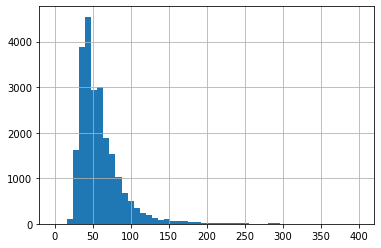

In [177]:
draw_hist('total_area', 0, 400)

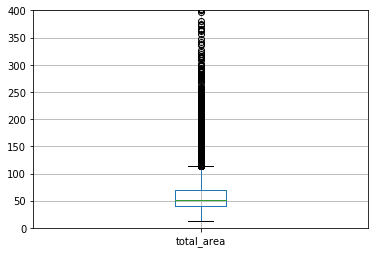

In [178]:
draw_boxplot('total_area', 0, 400)

По графикам можно сделать вывод, что наибольшее количество квартир с площадью 30 - 70 $м^2$. Пик приходится примерно на 45 $м^2$. Это выглядит правдоподобно, так как в реальной жизни основная доля квартир это 1-2 комнатные квартиры.

***Построим графики для цены квартиры.***

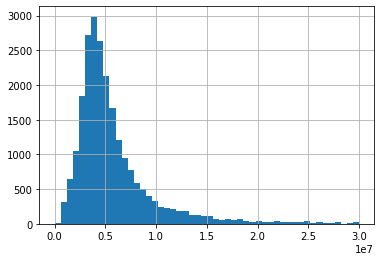

In [179]:
draw_hist('last_price', 0, 30000000)

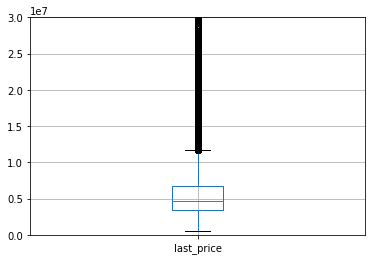

In [180]:
draw_boxplot('last_price', 0, 30000000)

По графикам делаем вывод, что основной диапазон цен, по которым продаются квартиры это от 3,5 до 7 млн.

***Построим графики для числа комнат.***

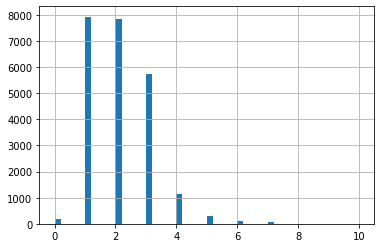

In [181]:
draw_hist('rooms', 0, 10)

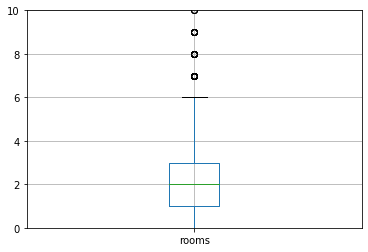

In [182]:
draw_boxplot('rooms', 0, 10)

Делая вывод из графиков, видно, что основные квартиры 1-2 комнатные, что подтверждает вывод по общей площади. Немногим меньше количество трехкомнатных квартир. Нормальное распределение находится в пределах 0 - 6 комнат.

***Построим графики по высоте потолков.***

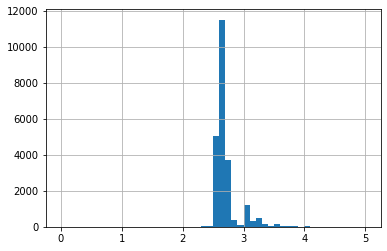

In [183]:
draw_hist('ceiling_height', 0, 5)

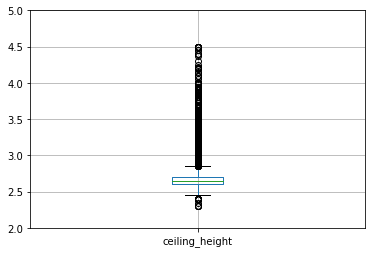

In [184]:
draw_boxplot('ceiling_height', 2, 5)

Наибольшее количество квартир с высотой потолков 2,60 - 2,70 м. Квартиры с высотой потолков более 3 метров встречаются заметно реже, скорее всего это здания старой постройки, находящиеся в центре Петербурга.

### Изучение времени продажи квартиры

Построим графики для столбца с временем продажи квартиры

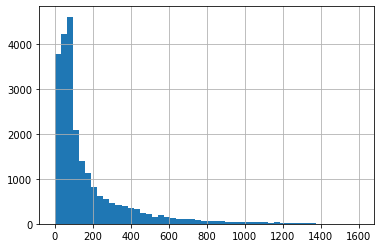

In [185]:
draw_hist('days_exposition', 0, 1600)

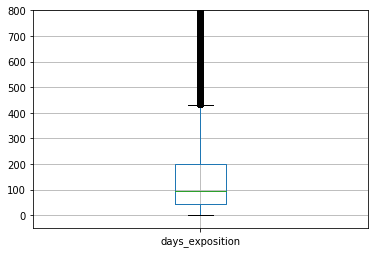

In [186]:
draw_boxplot('days_exposition', -50, 800)

Ожидаемо было увидеть гистограмму с длинным хвостом. Основная масса квартир продавалась за период до 200 дней, но и есть случаи времени продажи до 5 лет, видимо квартира находится в плохом состоянии или неблагополучном районе, а может просто объявление то закрывали, то открывали.

In [187]:
df['days_exposition'].describe()

count    23323.000000
mean       170.204562
std        207.284699
min          1.000000
25%         45.000000
50%         95.000000
75%        200.000000
max       1580.000000
Name: days_exposition, dtype: float64

Изучив среднее и медиану, можно сделать вывод что в среднем квартиры продаются от 3 до 6 месяцев. Очень быстрой продажу можно считать, если сделка совершена за 45 дней. Необычно долгой продажей является срок примерно более 450 дней (15 месяцев).

### Обработка редких и выбивающихся значений

Данная работа была проведена на этапе предобработки данных.

В столбце 'last_price' были как сильно больщие (более 100 млн (max = 763млн)), так и очень маленькие значения (min = 12190). С помощью запроса query избавились от них .

В столбце 'rooms' - присутствовали значения 0 комнат, определились, что это квартиры-студии и перепланировка.

В столбце 'ceiling_height' - были обнаружены слишком маленькие значения ниже 180см, а также слишком высоки выше 10 м. С помощью запроса query сохранил срез данных с высотой потолков 2,30 - 4,50 м. 

В стобце 'locality_name' - были обнаружены значения где "поселок" написан с буквой "ё" - исправлено. 

В столбцах с расстояниями airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest было обнаружено большое количество пропусков. Чтобы не искажать данные для анализа значения оставлены пустыми.

### Факторы, влияющие на стоимость квартиры

Проверим зависимость цены от площади, количества комнат и расстояния до центра.  

Построим матрицу корреляции к этим величинам.

In [188]:
index = df.index
price_rooms_area_corr = df.pivot_table(
    index=index, values=['last_price','total_area','rooms', 'cityCenters_nearest'], aggfunc='mean')
price_rooms_area_corr.corr()

,cityCenters_nearest,last_price,rooms,total_area
cityCenters_nearest,1.000000,-0.302758,-0.180690,-0.234467
last_price,-0.302758,1.000000,0.474906,0.766526
rooms,-0.180690,0.474906,1.000000,0.781004
total_area,-0.234467,0.766526,0.781004,1.000000


Автоматизируем построение диаграмм рассеяния с помощью функции.

In [189]:
def draw_plot(data, y, x):
    data.plot(y=y, x=x, kind='scatter', alpha=0.1, grid=True, figsize=(8, 5))

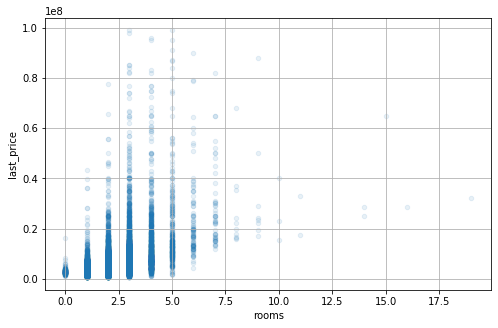

In [190]:
draw_plot(price_rooms_area_corr, 'last_price', 'rooms')

Исследуя матрицу корреляции и диаграммы, заметно что связь между ценой и количеством комнат слабая. До 3 комнат включительно она присутствует, и, что естественно от однокомнатной к трехкомнатной цена растет. На четырехкомнатных квартирах взаимосвязь слабнет, а после уже практически исчезает.

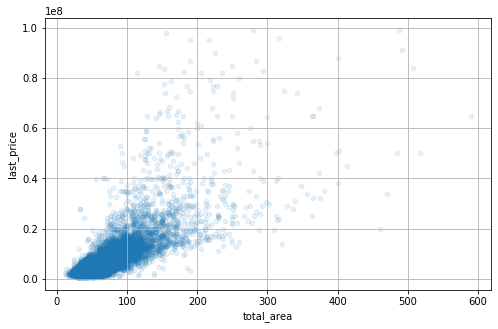

In [191]:
draw_plot(price_rooms_area_corr, 'last_price', 'total_area')

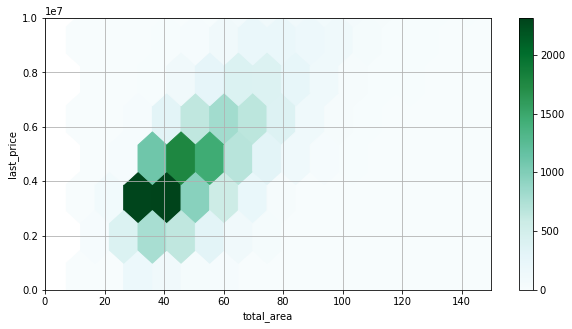

In [192]:
df.plot(x='total_area', y='last_price', kind='hexbin', 
        gridsize=60, figsize=(10, 5), sharex=False, grid=True, xlim=(0, 150), ylim=(0, 10000000));

Между ценой квартиры и общей площадью присутствует средняя взаимосвязь. Основное ее проявление находится в диапазоне площади квартиры от 30 до 60 $м^2$, далее связь слабнет значительно.

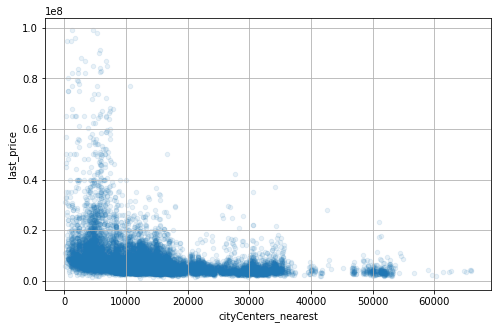

In [193]:
draw_plot(price_rooms_area_corr, 'last_price', 'cityCenters_nearest')

Коэффициент корреляции между ценой и расстоянием до центра слабый и отрицательный. В целом, конечно, наблюдается снижение цены квартиры с увеличением расстояния от центра. Количество более дорогих квартир возрастает на расстоянии 5-7 км от центра. Наблюдается просадка в цене на расстоянии 17-18 км - это граница скорее всего КАД. Видны отдельные всплески цены на расстоянии 22, 30-35, 40 и 50 км от центра - это скорее всего города-спутники Санкт-Петербурга, такие как Пушкин, Всеволожск, Колпино и др.

***Проверим зависимость цены квартиры от того, на каком этаже она расположена.***

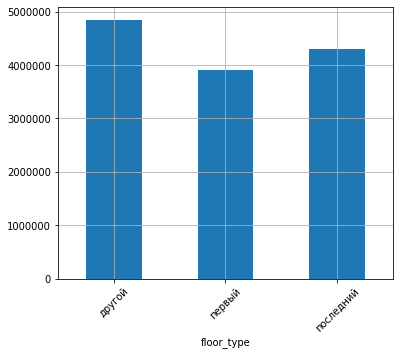

In [194]:
floor_type_median = df.groupby('floor_type')['last_price'].median()
floor_type_median.plot(x=floor_type_median.index, y=floor_type_median.values, kind='bar', grid=True, figsize=(6,5), rot=45);

Столбчатый график отчетливо показывает, что цена на квартиру на первом этаже ниже чем на других этажах, и это очевидно, так как спрос на квартиру на первом этаже всегда ниже. Последний этаж тоже не в фаворе у людей, предпочтительнее другие этажи.

***Изучение зависимости цены от даты размещения объявления.***

In [195]:
exposition_date = df.pivot_table(
    index=index, values=['weekday_exposition', 'month_exposition', 'year_exposition', 'last_price'], aggfunc='mean')
exposition_date.corr()

,last_price,month_exposition,weekday_exposition,year_exposition
last_price,1.000000,0.005342,-0.004853,-0.050491
month_exposition,0.005342,1.000000,0.012396,-0.270182
weekday_exposition,-0.004853,0.012396,1.000000,-0.001922
year_exposition,-0.050491,-0.270182,-0.001922,1.000000


Скорее всего зависимость между этими параметрами нелинейная, и матрица корреляции в данном случае не очень информативна.  
Попробуем взглянуть на матрицу диаграмм рассеяния.

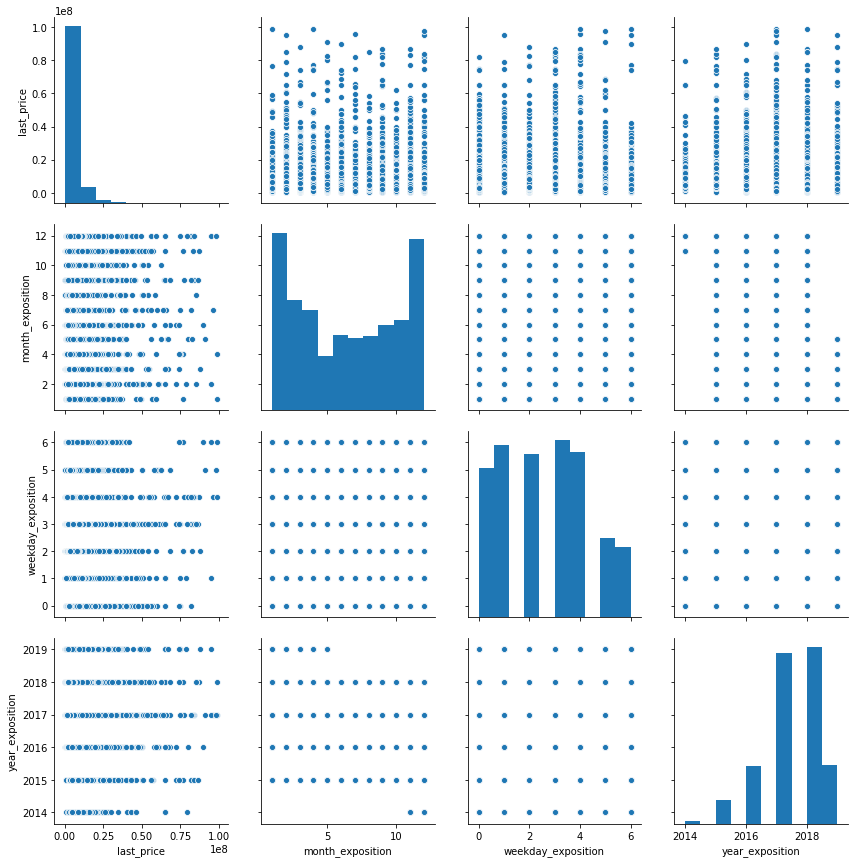

In [196]:
sns.pairplot(exposition_date, kind='scatter', height=3);

По матрице можно сделать следующие выводы:
- Заметна тендеция в росте цены квартиры от года к году;
- В четверг и пятницу публикуются наиболее дорогие объявления, в выходные - наиболее дешевые;
- Цена квартир, в период с февраля по май снижается, а в период с июня по декабрь, пусть нелинейно, но растет. В январе наблюдается относительное затишье по ценам. 

### Определение 10 населённых пунктов с наибольшим числом объявлений

Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья.

                   count  mean_sq_m_price
locality_name                            
Санкт-Петербург    15538    113475.278028
поселок Мурино       548     85576.658759
поселок Шушары       439     78551.990888
Всеволожск           397     68720.214106
Пушкин               366    102942.808743
Колпино              338     75424.322485
поселок Парголово    326     90333.561350
Гатчина              306     68757.594771
деревня Кудрово      299     92472.013378
Выборг               235     58238.012766


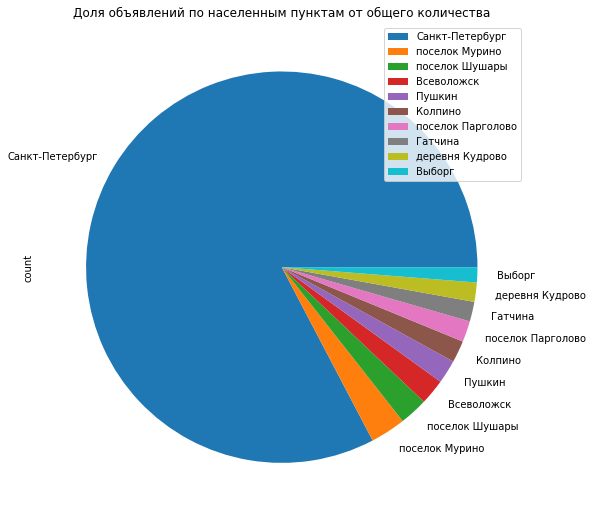

In [197]:
locality_and_price = df.loc[:, ['locality_name', 'sq_m_price']]
locality_and_price = locality_and_price.pivot_table(index='locality_name', values='sq_m_price', aggfunc=['count', 'mean'])
locality_and_price.columns = ['count', 'mean_sq_m_price']
top10_locality = locality_and_price.sort_values(by='count', ascending=False).head(10)
print(top10_locality)
top10_locality.plot(y='count', kind='pie', title='Доля объявлений по населенным пунктам от общего количества',figsize=(9, 9));

Отметим следующее: самая дорогая цена за квадратный метр жилья в Санкт_петербурге и Пушкине, что вполне соответствует действительности. Из представленных населенных пунктов дешевле всего жилье в Выборге.

### Изучение предложения квартир в Санкт-Петербурге

Выделим квартиры в Санкт-Петербурге и  выясним, какая область входит в центр. Создадим столбец с расстоянием до центра в километрах, округленный до целых значений. После этого посчитаем среднюю цену для каждого километра и построим график, показывающий, как цена зависит от удалённости от центра.

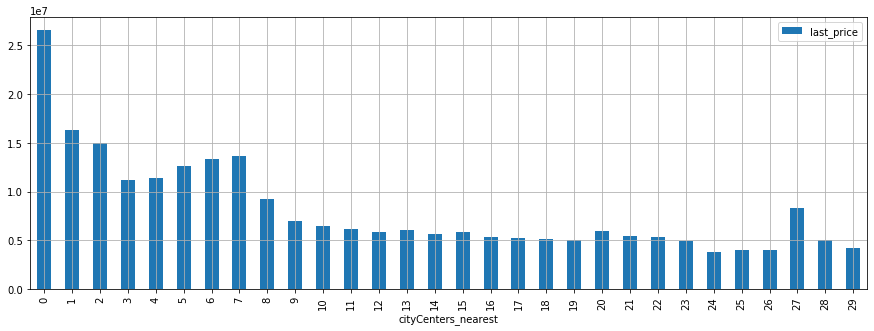

In [198]:
# выделим квартиры из Санкт-Петербурга
spb_flats = df.query('locality_name == "Санкт-Петербург"')
spb_flats.dropna(subset = ['cityCenters_nearest'], inplace = True)
spb_flats.reset_index(drop=True)
# округлим значения до километра
spb_flats['cityCenters_nearest'] = (spb_flats['cityCenters_nearest']/1000).round().astype(int)
# определим среднюю цену для километра и построим график
spb_flats_pivot = spb_flats.pivot_table(index='cityCenters_nearest', values='last_price', aggfunc=('mean'))
spb_flats_pivot.plot(y='last_price', kind='bar', grid=True, figsize=(15, 5));

Делая вывод по графику, можно сказать, что есть два центральных сегмента. В радиусе до 1 км - это исторический центр, со средней ценой квартиры около 27 млн. И более обширная центральная зона в радиусе 7 км, со средней ценой квартиры около 13 млн. На расстоянии более 7 км от центра наблюдается заметное падение цены - это значение и будем считать границей центральной зоны города.

### Изучение сегмента квартир в центре Санкт-Петербурга

Проанализируем центральную территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделаем выводы и сравним отличаются ли они от общих выводов по всему городу.

In [199]:
spb_center = spb_flats.query('cityCenters_nearest <= 7')

Изучение параметров квартир для центра Санкт-Петербурга и для всего города в целом.

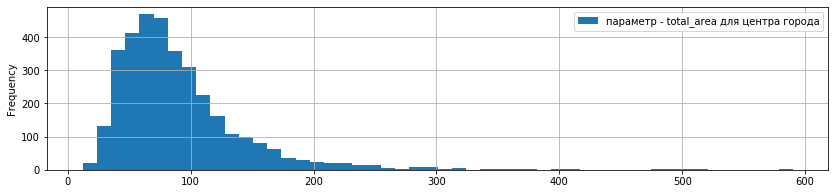

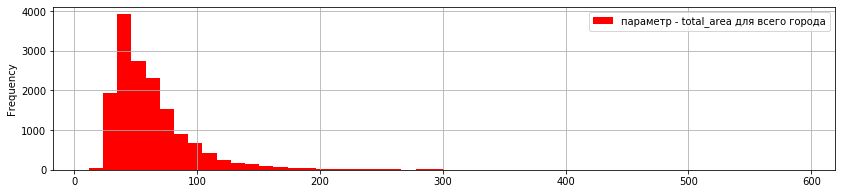

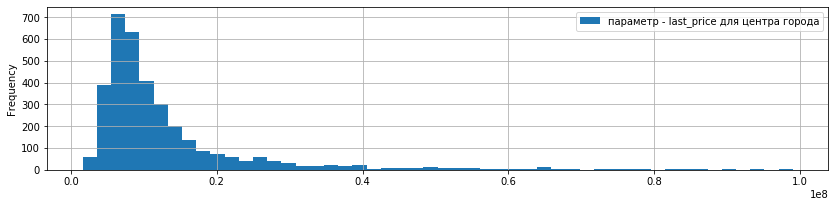

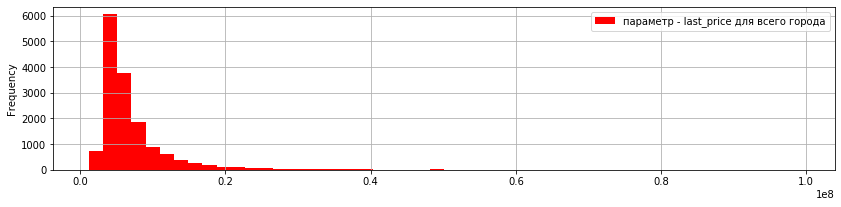

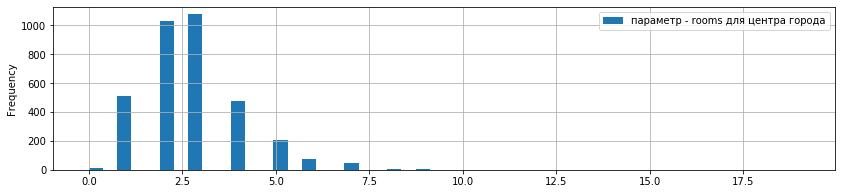

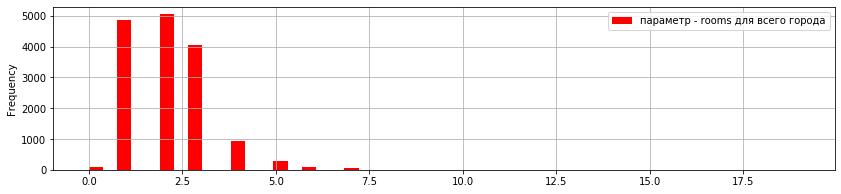

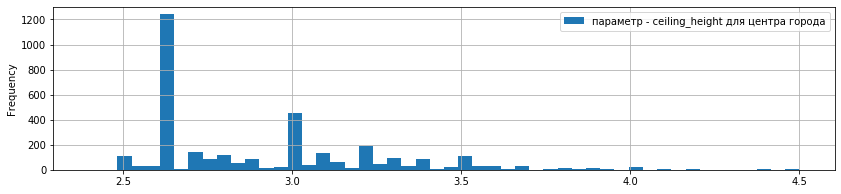

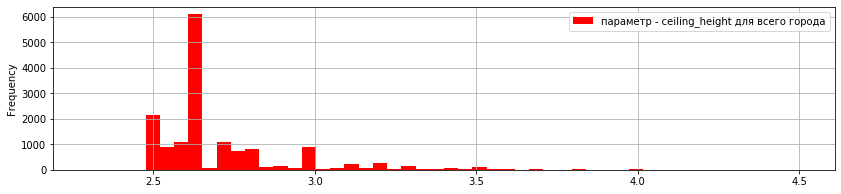

In [200]:
for col in ['total_area', 'last_price', 'rooms', 'ceiling_height']:
    spb_center.plot(y=col, kind='hist', grid=True, figsize=(14,3), bins=50, 
                    alpha=1, legend=True, label='параметр - '+col+' для центра города')
    spb_flats.plot(y=col, kind='hist', grid=True, figsize=(14,3), bins=50, 
                   alpha=1, legend=True, label='параметр - '+col+' для всего города', color='r')
    plt.show()

Исследуя гистограммы обнаружены следущие особенности:
- Диапазон площади большинства продаваемых квартир в центре города больше, чем по всему городу: 40-130 $м^2$ против 30-70 $м^2$;
- Естественным выглядит и то, что цена на квартиры в центре выше, чем по городу в целом;
- Основная доля продаж в центре приходится на 2-х и 3-х комнатные квартиры, а по городу на 1-2 комнатные квартиры;
- В центре города выделяется сегмент квартир с высокими потолками 3-3,5 м, а в целом по городу этот сегмент представлен слабо. Отметим, что медиана по высоте потолков (2,65 м) выделяется на обоих графиках. 

***Сравнение факторов, влияющих на цену квартиры.***

Построим матрицы корреляции, сравниваемых параметров.

In [201]:
# матрица корреляции для всего города
index_spb = spb_flats.index
analys_spb = spb_flats.pivot_table(
    index=index_spb, values=['days_exposition', 'rooms', 'cityCenters_nearest', 'last_price'], aggfunc='mean')
print('Матрица корреляции для всего города')
display(analys_spb.corr())
# матрица корреляции для центра города
index_spb_center = spb_center.index
analys_spb_center = spb_center.pivot_table(
    index=index_spb_center, values=['days_exposition', 'rooms', 'cityCenters_nearest', 'last_price'], aggfunc='mean')
print('Матрица корреляции для центра города')
display(analys_spb_center.corr())

Матрица корреляции для всего города


,cityCenters_nearest,days_exposition,last_price,rooms
cityCenters_nearest,1.000000,-0.118208,-0.375319,-0.288669
days_exposition,-0.118208,1.000000,0.107890,0.112268
last_price,-0.375319,0.107890,1.000000,0.493060
rooms,-0.288669,0.112268,0.493060,1.000000


Матрица корреляции для центра города


,cityCenters_nearest,days_exposition,last_price,rooms
cityCenters_nearest,1.000000,-0.047632,-0.042440,-0.163717
days_exposition,-0.047632,1.000000,0.069482,0.097922
last_price,-0.042440,0.069482,1.000000,0.406953
rooms,-0.163717,0.097922,0.406953,1.000000


Проверим зависимость от вида этажа.

Квартиры в центре


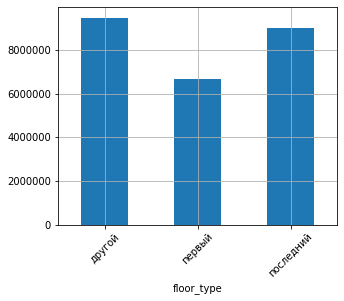

Квартиры во всем городе


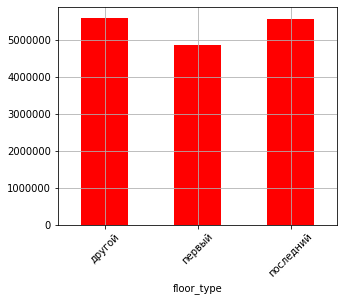

In [202]:
floor_type_median_spb_center = spb_center.groupby('floor_type')['last_price'].median();
floor_type_median_spb = spb_flats.groupby('floor_type')['last_price'].median();
print('Квартиры в центре')
plt.show()
floor_type_median_spb_center.plot(x=floor_type_median_spb_center.index, y=floor_type_median_spb_center.values, 
                                  kind='bar', grid=True, figsize=(5,4), rot=45)
plt.show()
print('Квартиры во всем городе')
floor_type_median_spb.plot(x=floor_type_median_spb.index, y=floor_type_median_spb.values, kind='bar', 
                           grid=True, figsize=(5,4), rot=45, color='r');

Подводя итоги по факторам, влияющим на цену квартиры, отметим следующее:
- Для всего города корреляция между ценой и расстоянием до центра слабая и отрицательная, что все-таки говорит о том, что цена падает с удалением от центра. Для центра города, понятное дело, данная взаимосвязь отсутствует;
- Связь между датой публикации и ценой не прослеживается;
- Количество комнат немного слабее влияет на цену в центре города, но взаимосвязь прослеживается: чем больше комнат, тем дороже;
- Квартиры на первом этаже стоят дешевле одинаково по всему городу. А вот последний этаж в центре города не уступает другим этажам, это, скорее всего связано с тем, что в центре города малоэтажная и среднеэтажная застройка.

## Общий вывод

Получен и изучен архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Исходный файл представлял из себя таблицу размером 23699 строк и 22 столбца.  
В ходе предообработки данных были заполнены пропущенные данные в исследуемых столбцах и изменен тип данных, где это необходимо.  
В ходе исследовательского анализа были отобраны основные параметры (общая площадь, цена, число комнат, высота потолков, расстояние до центра)и установлена связь (корреляция) между разными параметрами. Для наглядности проведенного анализа построены графики и матрицы.  

В ходе работы над проектом пришел к выводам:
- Больше всего квартир продаются в ценовом диапазоне 3,5 - 7 млн;
- Наибольшее количество квартир с площадью 30 - 70  $м^2$ . Пик приходится примерно на 45  $м^2$ . Итог - основная доля квартир это 1-2 комнатные квартиры;
- Наибольшее количество квартир с высотой потолков 2,60 - 2,70 м.;
- На стоимость квартиры больше влияет её площадь(высокая и прямопропорцианальная зависимость). Затем следует фактор - количество комнат (средняя и прямопропорцианальная зависимость). Среднее влияние оказывает удаленность от центра  (обратная зависимость - с ростом расстояния от центра, цена на квартиры снижается). Стоит отметить, что есть зависимость от этажа - первый этаж самый дешевый и цена его существенно отличается от остальных. Жители предпочитают не первый и не последний этаж - его цена выше;
- Дороже всего квартиры стоят в Санкт-Петербурге и в Пушкине, дешевле всего квартиру можно купить в Выборге;
- От дня размещения объявления до продажи квартиры в среднем проходит 3-6 месяцев;
- Квартиры, выставленные на продажу в выходные, дешевле, чем в другие дни недели;
- Цена квартир, в период с февраля по май снижается, а в период с июня по декабрь, нелинейно, но растет. В январе наблюдается относительное затишье по ценам.